In [2]:
# read_file_bluesee imports
from read_file_bluesee_1 import *

In [3]:
# extract notebook timestamp and sensor hex data from raw logged files for each condition

directory = 'data_collection'

neck_bad = decode_logged_file(directory, 'neck_bad')
back_bad = decode_logged_file(directory, 'back_bad')
neck_good = decode_logged_file(directory, 'neck_good')
back_good = decode_logged_file(directory, 'back_good')

neck_bad_decode = decode_hex_value(neck_bad)
back_bad_decode = decode_hex_value(back_bad)
neck_good_decode = decode_hex_value(neck_good)
back_good_decode = decode_hex_value(back_good)

# create dataframes for each condition
neck_bad_df = create_dataframe(neck_bad_decode)
back_bad_df = create_dataframe(back_bad_decode)
neck_good_df = create_dataframe(neck_good_decode)
back_good_df = create_dataframe(back_good_decode)

# check sensor orientation
neck_bad_df = check_sensor_orientation(neck_bad_df)
back_bad_df = check_sensor_orientation(back_bad_df)
neck_good_df = check_sensor_orientation(neck_good_df)
back_good_df = check_sensor_orientation(back_good_df)

# synchronize sensors for each condition
bad_df_sync = synchronize(neck_bad_df, back_bad_df, num_trials = 8)
good_df_sync = synchronize(neck_good_df, back_good_df, num_trials = 22, is_good = True)

df = concat_dataframes([bad_df_sync, good_df_sync], sort_col='Notebook_Timestamp_Neck')

trial number 1 has insufficient number of datapoints: 402
trial number 2 has insufficient number of datapoints: 253
trial number 3 has insufficient number of datapoints: 225
trial number 1 has insufficient number of datapoints: 172
trial number 2 has insufficient number of datapoints: 114


In [4]:
df

,Notebook_Timestamp_Neck,"Quaternion_Orientation_(W, X, Y, Z)_Neck",Sensor_Timestamp,Status_Neck,Label_Neck,Notebook_Timestamp_Back,"Quaternion_Orientation_(W, X, Y, Z)_Back",Status_Back,Label_Back
0,01:56:20.003000,"(0.8322255611419678, -0.04902138561010361, -0....",0 days 00:00:00,00100000,neck_good_10,01:56:19.997000,"(0.7108583450317383, -0.2387552261352539, -0.6...",00100000,back_good_10
1,01:56:20.033000,"(0.8322974443435669, -0.04904297739267349, -0....",0 days 00:00:00.020012,00100000,neck_good_10,01:56:20.011000,"(0.7109321355819702, -0.23853595554828644, -0....",00100000,back_good_10
2,01:56:20.034000,"(0.8323510885238647, -0.049045007675886154, -0...",0 days 00:00:00.040023,00100000,neck_good_10,01:56:20.012000,"(0.7110407948493958, -0.23825488984584808, -0....",00100000,back_good_10
3,01:56:20.063000,"(0.8324238061904907, -0.04885202646255493, -0....",0 days 00:00:00.060031,00100000,neck_good_10,01:56:20.013000,"(0.7111358046531677, -0.23808898031711578, -0....",00100000,back_good_10
4,01:56:20.078000,"(0.8325163722038269, -0.0486564114689827, -0.5...",0 days 00:00:00.080042,00100000,neck_good_10,01:56:20.027000,"(0.7111834287643433, -0.2379899024963379, -0.6...",00100000,back_good_10
...,...,...,...,...,...,...,...,...,...
9995,22:08:30.412000,"(0.7267450094223022, -0.3523421585559845, -0.1...",0 days 00:00:20.874670,10110000,neck_bad_5,22:08:15.282000,"(0.127139151096344, -0.4554588496685028, 0.047...",00000100,back_bad_5
9996,22:08:30.450000,"(0.7331184148788452, -0.3578275144100189, -0.1...",0 days 00:00:20.894684,10110000,neck_bad_5,22:08:15.318000,"(0.12679548561573029, -0.4563538730144501, 0.0...",00000100,back_bad_5
9997,22:08:30.487000,"(0.736203134059906, -0.36073264479637146, -0.0...",0 days 00:00:20.914698,10110000,neck_bad_5,22:08:15.355000,"(0.12662485241889954, -0.4575359523296356, 0.0...",00000100,back_bad_5
9998,22:08:30.524000,"(0.7421345710754395, -0.3662568926811218, -0.0...",0 days 00:00:20.934712,10110000,neck_bad_5,22:08:15.356000,"(0.1265890747308731, -0.45894962549209595, 0.0...",00000100,back_bad_5


# DATA VISUALIZATION

In [5]:
def create_df_model(df, demo = False):
    '''
    This method is used to calculate the quaternion difference of the two quaternion sensor data and create dataframe for data visualization and modeling
    
    Input arguments:
    - df (Pandas dataframe) - preprocessed synchronized dataframe to work with
    - demo (Boolean) - whether the logged file is for the real-time demo application or not.
    
    Returns:
    - df (Pandas Dataframe) - dataframe containing the calculated quaternion difference of the two quaternion sensor data.
    '''
    
    df = df.copy(deep=True)
    
    a = 'Quaternion_Orientation_(W, X, Y, Z)_Neck'
    b = 'Quaternion_Orientation_(W, X, Y, Z)_Back'
    
    ### Extract the quaternion components for each quaternion
    # Q1 = Neck
    df['W1'] = df[a].str[0].to_numpy()
    df['X1'] = df[a].str[1].to_numpy()
    df['Y1'] = df[a].str[2].to_numpy()
    df['Z1'] = df[a].str[3].to_numpy()

    # Q2 = Back
    df['W2'] = df[b].str[0].to_numpy()
    df['X2'] = df[b].str[1].to_numpy()
    df['Y2'] = df[b].str[2].to_numpy()
    df['Z2'] = df[b].str[3].to_numpy()

    # Inverse(Q1) - Inverse of a quaternion is equal to the conjugate of the quaternion (source: https://www.3dgep.com/understanding-quaternions/)
    # Conjugate quaternion is calculated by negating the X, Y, Z components (source: https://www.meccanismocomplesso.org/en/hamiltons-quaternions-and-3d-rotation-with-python/)
    df['X1'] = df['X1'] * -1
    df['Y1'] = df['Y1'] * -1
    df['Z1'] = df['Z1'] * -1

    # Quaternion Difference = Q2 * Inverse(Q1)
    # Quaternion multiplication (source: https://www.meccanismocomplesso.org/en/hamiltons-quaternions-and-3d-rotation-with-python/)
    df['W'] = df['W1'] * df['W2'] - df['X1'] * df['X2'] - df['Y1'] * df['Y2'] - df['Z1'] * df['Z2']
    df['X'] = df['W1'] * df['X2'] + df['X1'] * df['W2'] + df['Y1'] * df['Z2'] - df['Z1'] * df['Y2']
    df['Y'] = df['W1'] * df['Y2'] + df['Y1'] * df['W2'] + df['Z1'] * df['X2'] - df['X1'] * df['Z2']
    df['Z'] = df['W1'] * df['Z2'] + df['Z1'] * df['W2'] + df['X1'] * df['Y2'] - df['Y1'] * df['X2']
    
    if demo:
        
        model_variables = ['W', 'X', 'Y', 'Z', 'Notebook_Timestamp_Neck']
        df = df[df.columns.intersection(model_variables)]
        df.columns = df.columns.str.replace('Notebook_Timestamp_Neck', 'Timestamp')
        
    else:
        
        # Label the data for binary classification (1 = good // 0 = bad)
        df['Label'] = np.where(df['Label_Neck'].str.slice(start=5, stop=9) == 'good', 1, 0)
        df['Color'] = np.where(df['Label_Neck'].str.slice(start=5, stop=9) == 'good', 'b', 'r') # for data visualization
        df['Trial'] = np.where(df['Label_Neck'].str.slice(start=-2, stop=-1) == '_', df['Label_Neck'].str.slice(start=-1), df['Label_Neck'].str.slice(start=-2))

        model_variables = ['W', 'X', 'Y', 'Z', 'Label', 'Trial', 'Color']

        df = df[df.columns.intersection(model_variables)]
    
    return df

In [6]:
df_clean = create_df_model(df)
df_clean

,W,X,Y,Z,Label,Color,Trial
0,0.951387,-0.052829,-0.169208,0.251879,1,b,10
1,0.951380,-0.052525,-0.169258,0.251940,1,b,10
2,0.951407,-0.052219,-0.169253,0.251911,1,b,10
3,0.951420,-0.052305,-0.169206,0.251880,1,b,10
4,0.951408,-0.052466,-0.169227,0.251881,1,b,10
...,...,...,...,...,...,...,...
9995,0.757696,-0.409143,0.094307,-0.499618,0,r,5
9996,0.752037,-0.406084,0.102609,-0.508940,0,r,5
9997,0.749211,-0.405044,0.106118,-0.513201,0,r,5
9998,0.743980,-0.401046,0.113545,-0.522270,0,r,5


# DATA VISUALIZATION

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import mplcursors
import joblib
%matplotlib widget

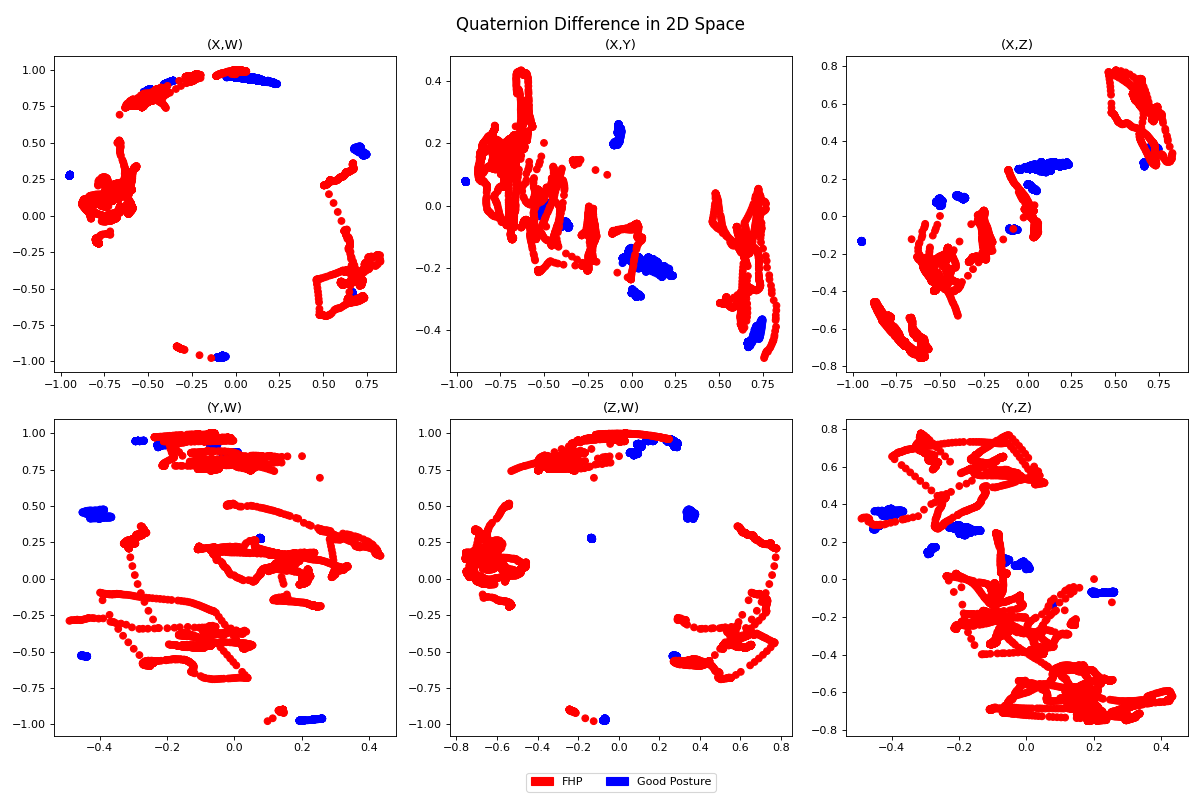

In [8]:
### PLOT QUATERNION COMPONENT PAIRS IN 2D SPACE ###

fig = plt.figure(figsize=(15,10), dpi=80)

# create 6 subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# (X,W)
ax1.title.set_text('(X,W)')
ax1.scatter(df_clean['X'], df_clean['W'], c=df_clean['Color'])

# (X,Y)
ax2.title.set_text('(X,Y)')
ax2.scatter(df_clean['X'], df_clean['Y'], c=df_clean['Color'])

# (X,Z)
ax3.title.set_text('(X,Z)')
ax3.scatter(df_clean['X'], df_clean['Z'], c=df_clean['Color'])

# (Y,W)
ax4.title.set_text('(Y,W)')
ax4.scatter(df_clean['Y'], df_clean['W'], c=df_clean['Color'])

# (Z,W)
ax5.title.set_text('(Z,W)')
ax5.scatter(df_clean['Z'], df_clean['W'], c=df_clean['Color'])
red = mpatches.Patch(color='red', label='FHP')
blue = mpatches.Patch(color='blue', label='Good Posture')
ax5.legend(handles=[red, blue], loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=2)

# (Y,Z)
ax6.title.set_text('(Y,Z)')
ax6.scatter(df_clean['Y'], df_clean['Z'], c=df_clean['Color'])

fig.suptitle('Quaternion Difference in 2D Space', fontsize=15)

fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

/Users/hyejin/opt/anaconda3/envs/iomt/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


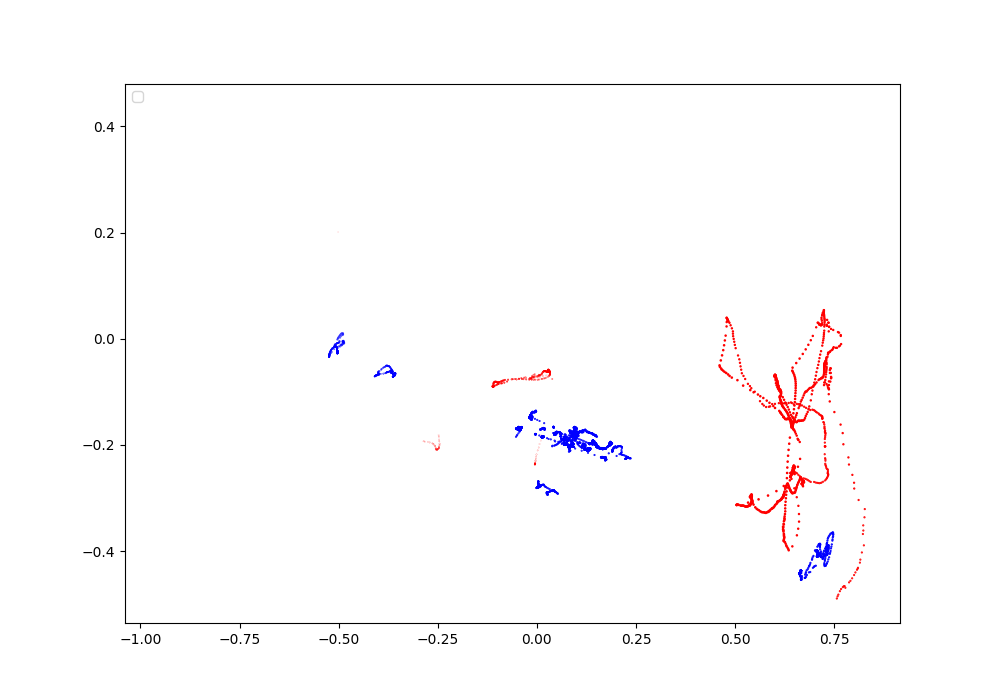

In [9]:
### PLOT 3D DATA PROJECTED INTO 2D SPACE ###

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

ax.scatter(df_clean['X'], df_clean['Y'], df_clean['Z'], c=df_clean['Color'])

cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=df_clean.iloc[sel.target.index]['Trial']) # trial number shows when cursor hovers over point

plt.legend(loc='upper left');

In [10]:
def split_df_model(df):
    '''
    This method is used to split the input dataframe into the two classes: good posture and FHP
    
    Input arguments:
    - df (Pandas Dataframe) - dataframe to split into the two class dataframes
    
    Returns:
    - df_bad (Pandas Dataframe) - dataframe that contains only the class of FHP data
    - df_good (Pandas Dataframe) - dataframe taht contains only the class of good posture data
    '''
    df_bad = df[df['Label'] == 0]
    df_good = df[df['Label'] == 1]
    df_bad = df_bad.reset_index(drop=True)
    df_good = df_good.reset_index(drop=True)
    return df_bad, df_good

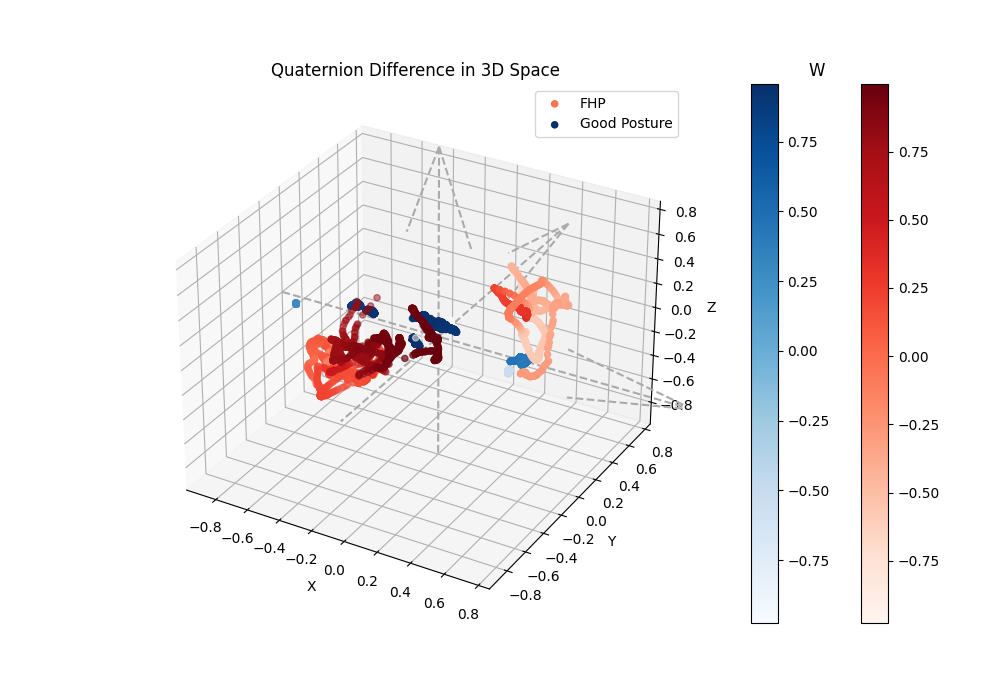

In [11]:
### PLOT 4D DATA IN 3D SPACE ###

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection = '3d')

ax.quiver(-1, 0, 0, 2.5, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0, 2.5, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 2.5, color='#aaaaaa',linestyle='dashed')
ax.set_xlim3d(df_clean['X'].min(), df_clean['X'].max())
ax.set_ylim3d(df_clean['X'].min(), df_clean['X'].max())
ax.set_zlim3d(df_clean['X'].min(), df_clean['X'].max())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

df_bad, df_good = split_df_model(df_clean)

img_bad = ax.scatter(df_bad['X'], df_bad['Y'], df_bad['Z'], c=df_bad['W'], label='FHP', cmap='Reds')
img_good = ax.scatter(df_good['X'], df_good['Y'], df_good['Z'], c=df_good['W'], label='Good Posture', cmap='Blues')

cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=df_clean.iloc[sel.target.index]['Trial'])

plt.title("Quaternion Difference in 3D Space")
plt.colorbar(img_bad,fraction=0.05, pad=0.1)
bar = plt.colorbar(img_good, fraction=0.05, pad=0.1)
bar.ax.set_title('                    W')
ax.legend(loc='best')
plt.show()

In [12]:
def create_df_model_final(df, demo = False):
    '''
    This method is used to create the final dataframe used for the algorithm implementation, only containing the necessary variables.
    
    Input arugments:
    - df (Pandas Dataframe) - the dataframe that will be used for algorithm implementation
    - demo (Boolean) - whether the logged file is for the real-time demo application or not.
    
    Returns:
    - df (Pandas Dataframe) - Datafarme only containing the necessary information for algorithm implementation
    '''
    if demo:
        model_variables = ['W', 'X', 'Y', 'Z']
    else:
        model_variables = ['W', 'X', 'Y', 'Z', 'Label', 'Trial']
    df = df[df.columns.intersection(model_variables)]
    return df

In [13]:
df_final = create_df_model_final(df_clean)
df_final

,W,X,Y,Z,Label,Trial
0,0.951387,-0.052829,-0.169208,0.251879,1,10
1,0.951380,-0.052525,-0.169258,0.251940,1,10
2,0.951407,-0.052219,-0.169253,0.251911,1,10
3,0.951420,-0.052305,-0.169206,0.251880,1,10
4,0.951408,-0.052466,-0.169227,0.251881,1,10
...,...,...,...,...,...,...
9995,0.757696,-0.409143,0.094307,-0.499618,0,5
9996,0.752037,-0.406084,0.102609,-0.508940,0,5
9997,0.749211,-0.405044,0.106118,-0.513201,0,5
9998,0.743980,-0.401046,0.113545,-0.522270,0,5


In [14]:
import random

def train_test_split_trial(df):
    '''
    This method is used to split the data into train/test dataset. 80/20 split is used.
    
    Input arguments:
    - df (Pandas Dataframe) - the data to split the data into train/test datasets
    
    Returns:
    - X_train (Pandas Dataframe) - The X feature vectors used as model input during training (4 features = 4 quaternion difference components)
    - X_test (Pandas Dataframe) - The X feature vecotrs used for testing the model (4 features = 4 quaternion difference components)
    - y_train (Pandas Dataframe) - The ground-truth labels of the data used during training (2 labels = good posture vs FHP)
    - y_test (Pandas Dataframe) - The ground-truth labels of the test data used to calculate model prediction accuracy after training (2 labels = good posture vs FHP)
    '''
    
    df = df.copy(deep=True)
    
    # randomly select test dataset by trial
    # trial is used instead of randomly mixing the dataset to avoid data leakage
    
    df_bad, df_good = split_df_model(df)
    bad_trials = df_bad['Trial'].unique()
    good_trials = df_good['Trial'].unique()
    
    test_trial_good = random.choice(good_trials)
    test_trial_bad = random.choice(bad_trials)

    # obtain the training dataset filtering out the trial number x condition for testing
    df_train_good = df[(df['Trial'] != str(test_trial_good)) & (df['Label'] == 1)]
    df_train_bad = df[(df['Trial'] != str(test_trial_bad)) & (df['Label'] == 0)]

    df_train = concat_dataframes([df_train_good, df_train_bad], sort_col = 'Trial')

    # obtain the testing dataset by filtering for the trial number x condition for testing
    df_test_good = df[(df['Trial'] == str(test_trial_good)) & (df['Label'] == 1)]
    df_test_bad = df[(df['Trial'] == str(test_trial_bad)) & (df['Label'] == 0)]

    df_test = concat_dataframes([df_test_good, df_test_bad], sort_col = 'Trial')

    # shuffle and set X and y variables for both train and test
    df_train = df_train.sample(frac=1).reset_index(drop=True)   
    df_test = df_test.sample(frac=1).reset_index(drop=True)
    
    X_train = df_train.iloc[:, 0:-2]
    y_train = df_train.iloc[:, -2]
    X_test = df_test.iloc[:, 0:-2]
    y_test = df_test.iloc[:, -2]
    
    return X_train, X_test, y_train, y_test

In [121]:
X_train, X_test, y_train, y_test = train_test_split_trial(df_final)

# CLASSIFICATION ALGORITHM: SUPPORT VECTOR MACHINE

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# PARAMS #

SVC_params = {'kernel': ['rbf'],
             'gamma': [0.001, 0.01, 0.1],
             'C': [0.1, 1]}

SVC_grid = GridSearchCV(SVC(), SVC_params, verbose = 3)

SVC_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.691 total time=   2.4s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.697 total time=   2.4s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.711 total time=   2.5s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.697 total time=   2.6s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.694 total time=   2.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.733 total time=   1.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.754 total time=   1.8s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.761 total time=   1.8s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.744 total time=   1.8s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.754 total time=   1.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   1.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf']},
             verbose=3)

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix

### SVC PARAM TUNING ###

# PARAM INFO
print('SVC (Grid Search Best Params):')
for key, value in SVC_grid.best_params_.items():
    print('{}: {}'.format(key, value))

# SCORE
SVC_grid_preds = SVC_grid.predict(X_test)
SVC_grid_acc = accuracy_score(y_test, SVC_grid_preds)
print('SVC (Grid Search Best Params) Accuracy: {}'.format(SVC_grid_acc))
SVC_grid_cm = confusion_matrix(y_test, SVC_grid_preds)
print('SVC (Grid Search Best Params) Confusion Matrix: \n{}'.format(SVC_grid_cm))

SVC (Grid Search Best Params):
C: 1
gamma: 0.1
kernel: rbf
SVC (Grid Search Best Params) Accuracy: 1.0
SVC (Grid Search Best Params) Confusion Matrix: 
[[1000    0]
 [   0 1000]]


# CLASSIFICATION ALGORITHM: DECISION TREE

In [124]:
from sklearn.tree import DecisionTreeClassifier

# PARAMS #

DTC_params = {'max_depth': [3, 4],
              'min_samples_split': [1, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

DTC_grid = GridSearchCV(DecisionTreeClassifier(), DTC_params, verbose = 3)

DTC_grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.977 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.978 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.982 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.986 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples

[CV 4/5] END max_depth=3, min_samples_leaf=4, min_samples_split=5;, score=0.986 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=4, min_samples_split=5;, score=0.988 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=5, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_samples_split=2;, score=0.977 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=5, min_samples_split=2;, score=0.978 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=2;, score=0.982 total time=   0.0s
[CV 4/5] END max_dep

[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=5;, score=0.986 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=5;, score=0.986 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=3, min_samples_split=5;, score=0.990 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=4, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=4, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=4, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=4, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=4, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=4, min_samples_split=2;, score=0.979 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=4, min_samples_split=2;, score=0.978 total time=   0.0s
[CV 3/5] END max_dep

/Users/hyejin/opt/anaconda3/envs/iomt/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hyejin/opt/anaconda3/envs/iomt/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hyejin/opt/anaconda3/envs/iomt/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/Users/hyejin/opt/anaconda3/envs/iomt/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 254, in 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             verbose=3)

In [125]:
### DTC PARAM TUNING ###

# PARAM INFO
print('DTC (Grid Search Best Params):')
for key, value in DTC_grid.best_params_.items():
    print('{}: {}'.format(key, value))

# SCORE
DTC_grid_preds = DTC_grid.predict(X_test)
DTC_grid_acc = accuracy_score(y_test, DTC_grid_preds)
print('DTC (Grid Search Best Params) Accuracy: {}'.format(DTC_grid_acc))
DTC_grid_cm = confusion_matrix(y_test, DTC_grid_preds)
print('DTC (Grid Search Best Params) Confusion Matrix: \n{}'.format(DTC_grid_cm))

DTC (Grid Search Best Params):
max_depth: 4
min_samples_leaf: 1
min_samples_split: 2
DTC (Grid Search Best Params) Accuracy: 0.889
DTC (Grid Search Best Params) Confusion Matrix: 
[[1000    0]
 [ 222  778]]


/Users/hyejin/opt/anaconda3/envs/iomt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


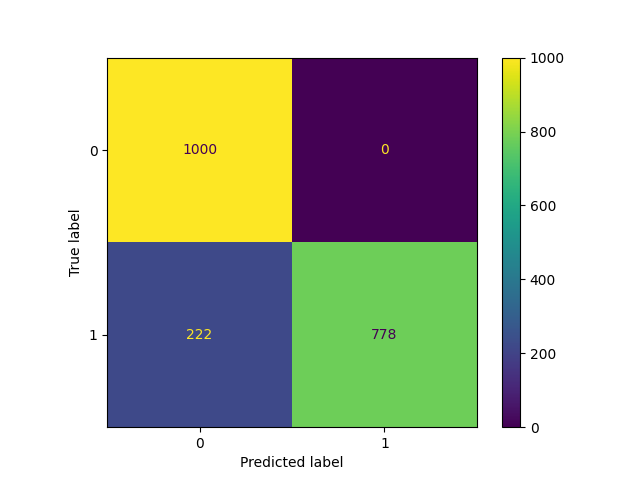

In [126]:
# confusion matrix visualized for easier interpretation

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DTC_grid, X_test, y_test)
plt.show();

# SAVE MODELS

In [30]:
SVC_grid_filename = 'SVC_grid7.sav'
joblib.dump(SVC_grid, SVC_grid_filename)

DTC_grid_filename = 'DTC_grid7.sav'
joblib.dump(DTC_grid, DTC_grid_filename)

['DTC_grid7.sav']